In [ ]:
!pip install pymc3
!pip install scipy==1.7.3 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [ ]:
from arviz import plot_posterior, summary, plot_trace

In [ ]:
def plot_traces(trcs, var_names=None):
    '''Plot traces with overlaid means and values'''

    nrows = len(trcs .varnames)
    if var_names is not None:
        nrows = len(var_names)

    ax = plot_trace(trcs, var_names=var_names, figsize=(12,nrows*1.4),
                      lines={k: v['mean'] for k, v in
                             summary(trcs,var_names=var_names).iterrows()})

    for i, mn in enumerate(summary(trcs, var_names=var_names)['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data',
                         xytext=(5,10), textcoords='offset points', rotation=90,
                         va='bottom', fontsize='large', color='#AA0022')

def strip_derived_rvs(rvs):
    '''Remove PyMC3-generated RVs from a list'''

    ret_rvs = []
    for rv in rvs:
        if not (re.search('_log',rv.name) or re.search('_interval',rv.name)):
            ret_rvs.append(rv)
    return ret_rvs

In [ ]:
glm_df = pd.read_csv('glm_data.csv')
glm_df

,Unnamed: 0,NumWords,Nouns,Verbs
0,0,16,3,3
1,1,28,8,4
2,2,27,5,3
3,3,40,9,6
4,4,32,7,4
...,...,...,...,...
2267,2267,24,3,4
2268,2268,17,3,1
2269,2269,35,5,6
2270,2270,27,2,1


In [ ]:
fml = 'NumWords ~ Nouns + Verbs + Nouns:Verbs'

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=glm_df, family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(4000, cores=2)

We recommend to instead use Bambi https://bambinos.github.io/bambi/
/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


In [ ]:
rvs = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
rvs

['Intercept', 'Nouns', 'Verbs', 'Nouns:Verbs', 'mu', 'alpha']

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/l

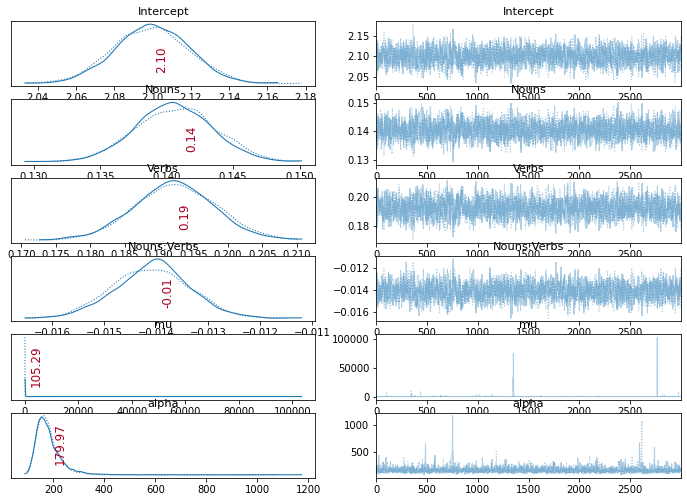

In [ ]:
plot_traces(trace[1000:], var_names=rvs)

In [ ]:
np.exp(summary(trace[1000:], var_names=rvs))

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,8.158008e+00,1.019182e+00,7.877417e+00,8.457047e+00,1.000000e+00,1.000000e+00,inf,inf,2.718282
Nouns,1.151425e+00,1.003005e+00,1.144537e+00,1.157196e+00,1.000000e+00,1.000000e+00,inf,inf,2.718282
Verbs,1.211671e+00,1.006018e+00,1.198415e+00,1.225072e+00,1.000000e+00,1.000000e+00,inf,inf,2.718282
Nouns:Verbs,9.860975e-01,1.001001e+00,9.841273e-01,9.870841e-01,1.000000e+00,1.000000e+00,inf,inf,2.718282
mu,5.315732e+45,inf,1.001001e+00,1.311611e+44,1.864295e+19,4.247769e+13,inf,inf,2.718282
alpha,1.446812e+78,5.668688e+24,7.079873e+44,9.923290e+113,4.499652e+00,3.126768e+00,inf,inf,2.718282
